In [38]:
import pandas as pd

gridDf = pd.read_csv('metrics_freedrag_experiments_1.csv')

gridDf.head()

,Category,Metric,Value,Eval_Root
0,art_work,avg LPIPS,0.957014,../freedrag_experiments/freedrag_diffusion_res...
1,land_scape,avg LPIPS,0.943471,../freedrag_experiments/freedrag_diffusion_res...
2,building_city_view,avg LPIPS,0.941149,../freedrag_experiments/freedrag_diffusion_res...
3,building_countryside_view,avg LPIPS,0.941073,../freedrag_experiments/freedrag_diffusion_res...
4,animals,avg LPIPS,0.968489,../freedrag_experiments/freedrag_diffusion_res...


## Extract all parameters into seperate variables

In [46]:
# Replace (-), That way the pattern is the same as the other rows and easy to extract with regex.
gridDf['Eval_Root'] = gridDf['Eval_Root'].str.replace('None', '(-)', regex=False)

In [73]:
import re

# Function to extract values from the eval_root string
def extract_parameters(row):
    pattern = (r'reduce_dims=\(([^)]+)\).*?'  # extract reduce_dims (handles values like (0-1))
               r'd_max=(\d+\.\d+).*?'      # extract d_max
               r'l_expected=(\d+\.\d+).*?' # extract l_expected
               r'L1m=(True|False).*?'           # extract L1m
               r'L1p=(True|False).*?'           # extract L1p
               r'L1mask=(True|False)')          # extract L1mask

    match = re.search(pattern, row['Eval_Root'])
    if match:
        return pd.Series({
            'reduce_dims': match.group(1),
            'd_max': float(match.group(2)),
            'l_expected': float(match.group(3)),
            'L1m': match.group(4) == 'True',
            'L1p': match.group(5) == 'True',
            'L1mask': match.group(6) == 'True'
        })
    return pd.Series({
        'reduce_dims': None,
        'd_max': None,
        'l_expected': None,
        'L1m': None,
        'L1p': None,
        'L1mask': None
    })

# Apply the function to the DataFrame gridDf
gridDf_new = pd.concat([gridDf, gridDf.apply(extract_parameters, axis=1)], axis=1)
gridDf_new = gridDf_new.drop(columns=['Eval_Root'])

gridDf_new.head(10)

,Category,Metric,Value,reduce_dims,d_max,l_expected,L1m,L1p,L1mask
0,art_work,avg LPIPS,0.957014,0,1.5,0.15,False,True,True
1,land_scape,avg LPIPS,0.943471,0,1.5,0.15,False,True,True
2,building_city_view,avg LPIPS,0.941149,0,1.5,0.15,False,True,True
3,building_countryside_view,avg LPIPS,0.941073,0,1.5,0.15,False,True,True
4,animals,avg LPIPS,0.968489,0,1.5,0.15,False,True,True
5,human_head,avg LPIPS,0.985977,0,1.5,0.15,False,True,True
6,human_upper_body,avg LPIPS,0.984641,0,1.5,0.15,False,True,True
7,human_full_body,avg LPIPS,0.983686,0,1.5,0.15,False,True,True
8,interior_design,avg LPIPS,0.961291,0,1.5,0.15,False,True,True
9,other_objects,avg LPIPS,0.972387,0,1.5,0.15,False,True,True


## Analyse the effect of Aggregations

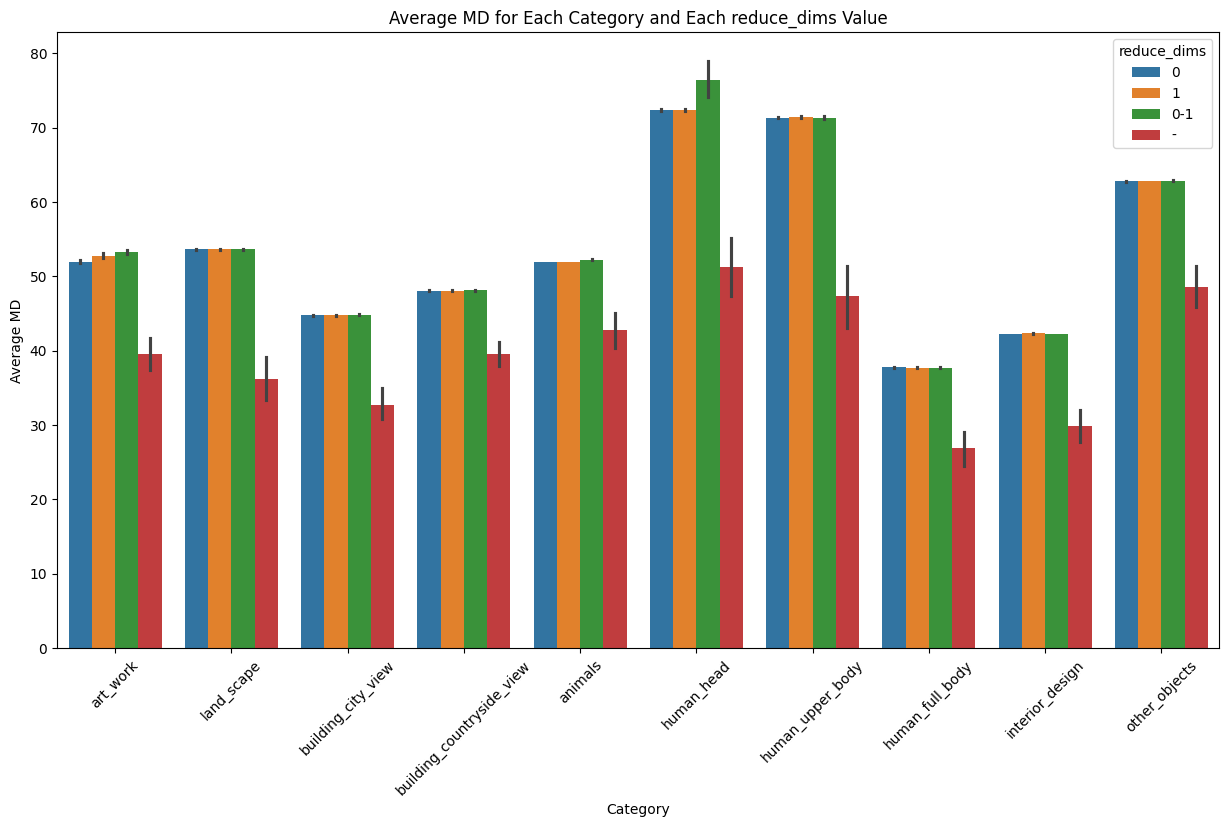

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

gridDf_select = gridDf_new[gridDf_new['Metric'] == 'avg MD']

plt.figure(figsize=(15, 8))
sns.barplot(data=gridDf_select, x='Category', y='Value', hue='reduce_dims')

plt.title('Average MD for Each Category and Each reduce_dims Value')
plt.xlabel('Category')
plt.ylabel('Average MD')
plt.legend(title='reduce_dims')
plt.xticks(rotation=45)
plt.show()

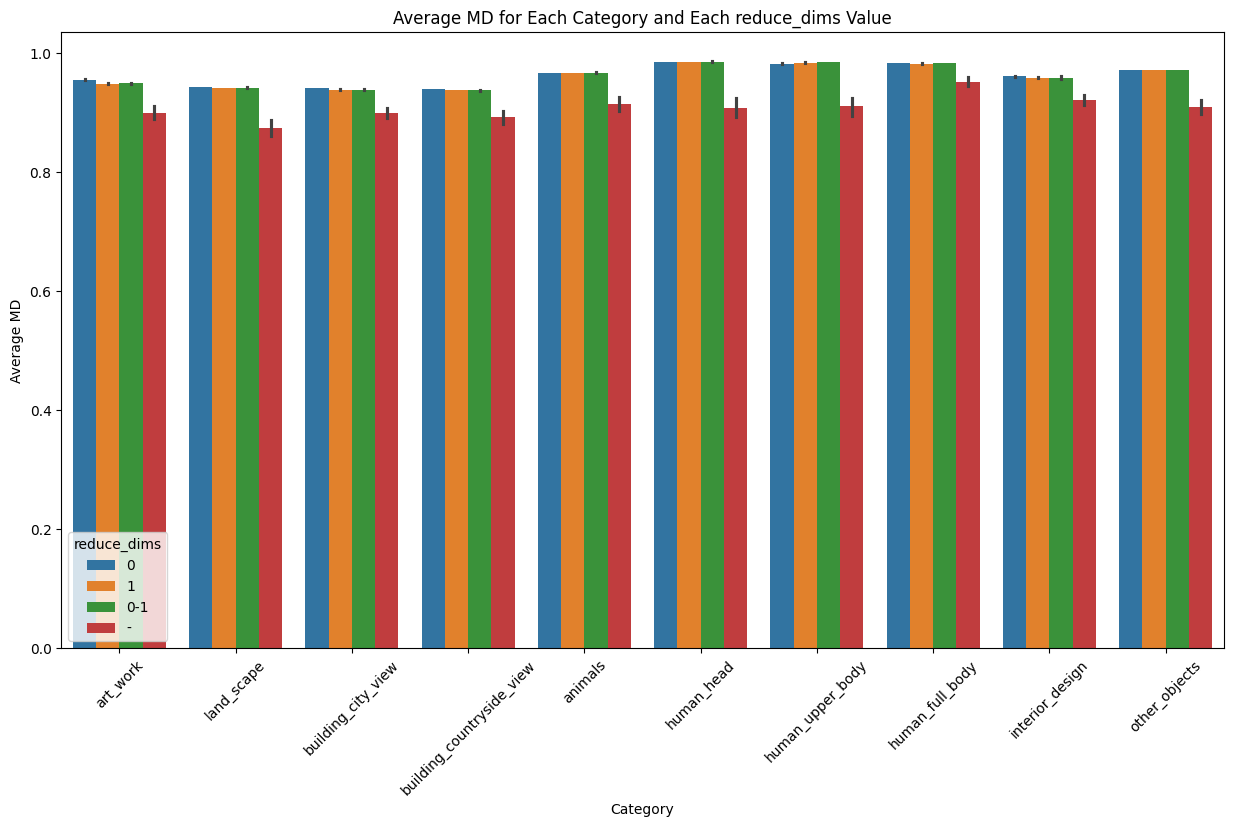

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

gridDf_select = gridDf_new[gridDf_new['Metric'] == 'avg LPIPS']

plt.figure(figsize=(15, 8))
sns.barplot(data=gridDf_select, x='Category', y='Value', hue='reduce_dims')

plt.title('Average MD for Each Category and Each reduce_dims Value')
plt.xlabel('Category')
plt.ylabel('Average MD')
plt.legend(title='reduce_dims')
plt.xticks(rotation=45)
plt.show()

## dive deeper into one category

In [78]:
gridDf_select = gridDf_new[(gridDf_new['Category'] == 'human_head') & (gridDf_new['Metric'] == 'avg MD') & (gridDf_new['reduce_dims'] == '0-1')]
grouped_df = gridDf_select .groupby(['Category','d_max','l_expected','Metric','L1m','L1p','L1mask'])['Value'].mean()
grouped_df.head(100)

Category    d_max  l_expected  Metric  L1m    L1p    L1mask
human_head  1.5    0.15        avg MD  False  False  False     72.380411
                                                     True      72.445339
                                              True   False     72.391625
                                                     True      72.563726
                                       True   False  False     72.224982
                                                     True      72.386835
                                              True   False     72.281047
                                                     True      72.362142
            3.0    0.30        avg MD  False  False  False     72.026071
                                                     True      88.696186
                                              True   False     88.415718
                                                     True      87.771445
                                       True   False  False     7

In [79]:
gridDf_select = gridDf_new[(gridDf_new['Category'] == 'human_head') & (gridDf_new['Metric'] == 'avg MD') & (gridDf_new['reduce_dims'] == '-')]
grouped_df = gridDf_select .groupby(['Category','d_max','l_expected','Metric','L1m','L1p','L1mask'])['Value'].mean()
grouped_df.head(100)

Category    d_max  l_expected  Metric  L1m    L1p    L1mask
human_head  1.5    0.15        avg MD  False  False  False     55.673803
                                                     True      56.213961
                                              True   False     38.831538
                                                     True      39.780513
                                       True   False  False     70.879998
                                                     True      71.463476
                                              True   False     70.720426
                                                     True      70.290592
            3.0    0.30        avg MD  False  False  False     51.417125
                                                     True      52.888260
                                              True   False     45.972296
                                                     True      47.049542
                                       True   False  False     6

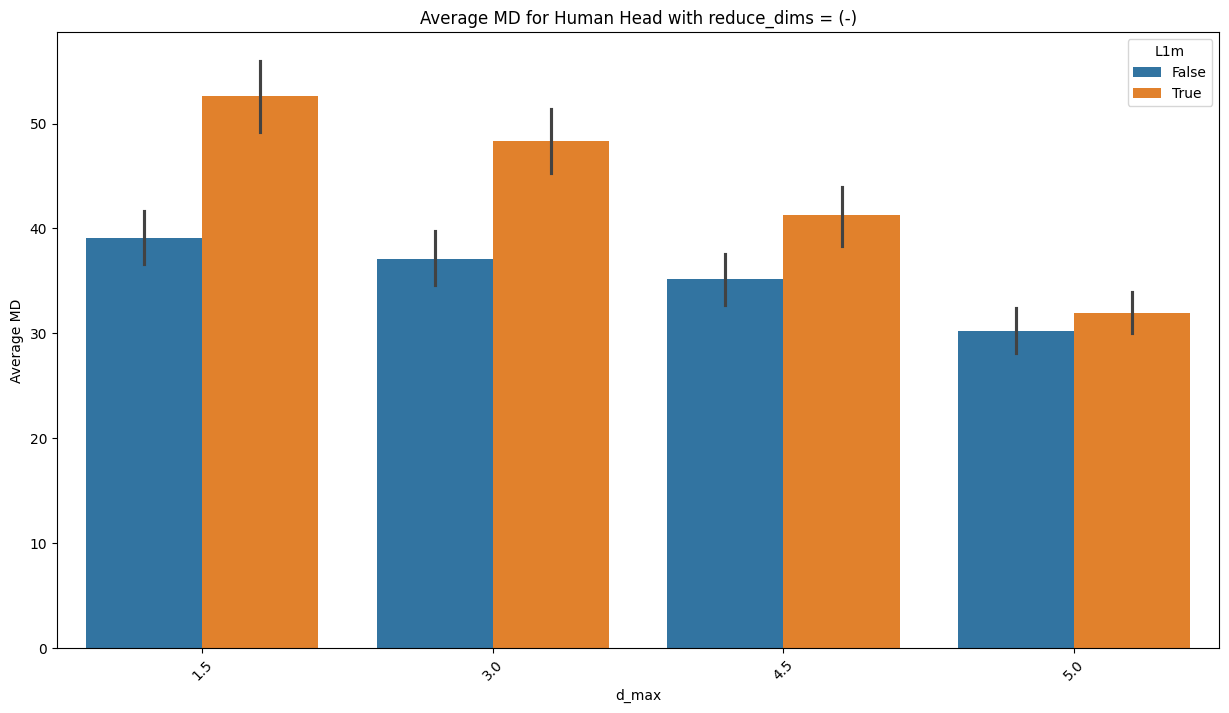

In [93]:
plt.figure(figsize=(15, 8))
sns.barplot(data=gridDf_select, x='d_max', y='Value', hue='L1m')

plt.title('Average MD for Human Head with reduce_dims = (-)')
plt.xlabel('d_max')
plt.ylabel('Average MD')
plt.legend(title='L1m')
plt.xticks(rotation=45)
plt.show()

## check the effect of L1m for all categories

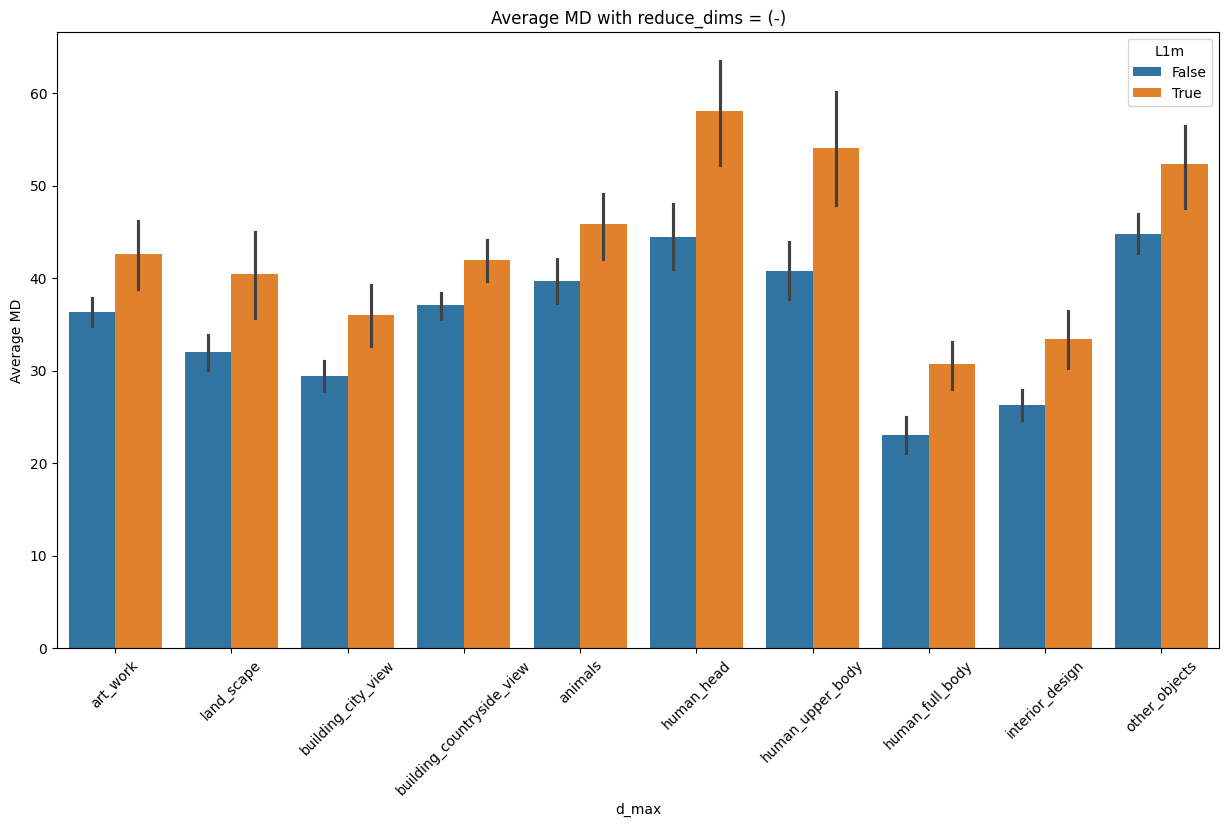

In [92]:
gridDf_select = gridDf_new[(gridDf_new['Metric'] == 'avg MD') & (gridDf_new['reduce_dims'] == '-')]

plt.figure(figsize=(15, 8))
sns.barplot(data=gridDf_select, x='Category', y='Value', hue='L1m')

plt.title('Average MD with reduce_dims = (-)')
plt.xlabel('d_max')
plt.ylabel('Average MD')
plt.legend(title='L1m')
plt.xticks(rotation=45)
plt.show()

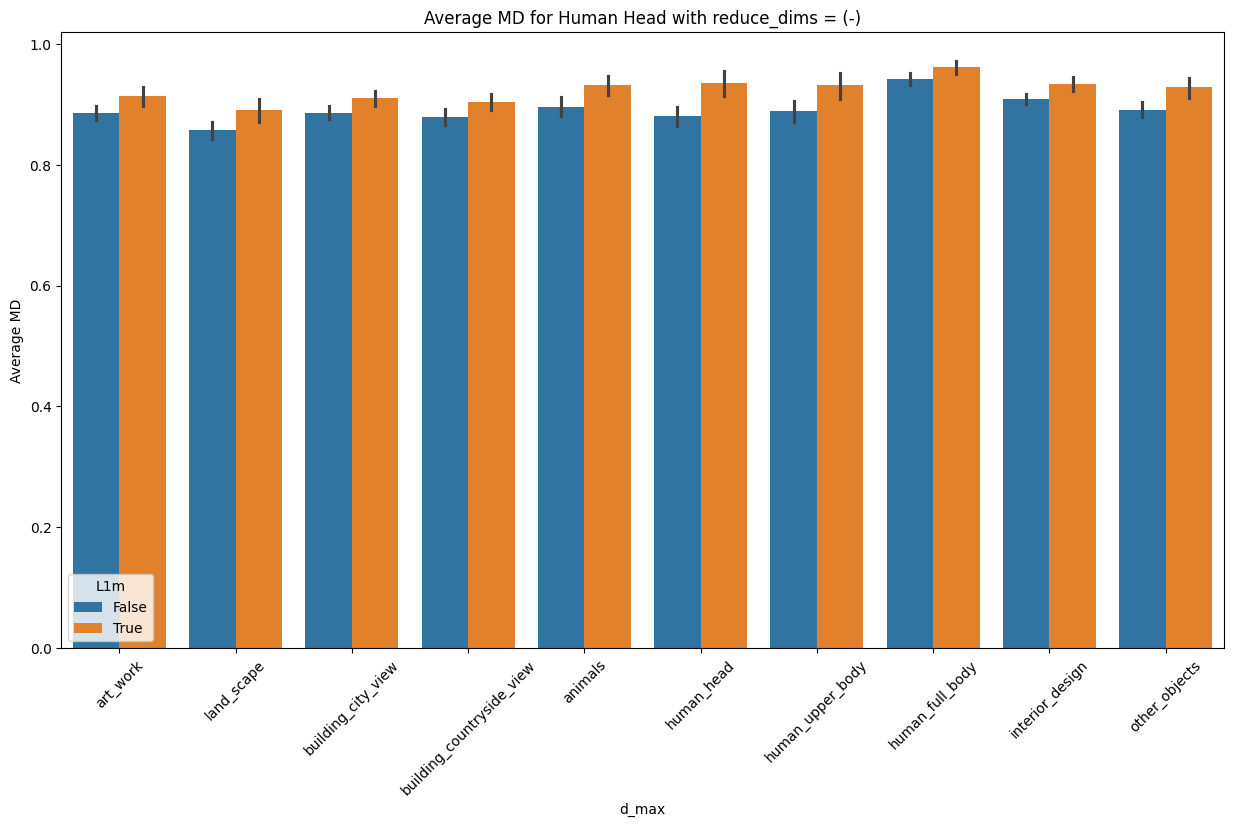

In [87]:
gridDf_select = gridDf_new[(gridDf_new['Metric'] == 'avg LPIPS') & (gridDf_new['reduce_dims'] == '-')]

plt.figure(figsize=(15, 8))
sns.barplot(data=gridDf_select, x='Category', y='Value', hue='L1m')

plt.title('Average MD for Human Head with reduce_dims = (-)')
plt.xlabel('d_max')
plt.ylabel('Average MD')
plt.legend(title='L1m')
plt.xticks(rotation=45)
plt.show()